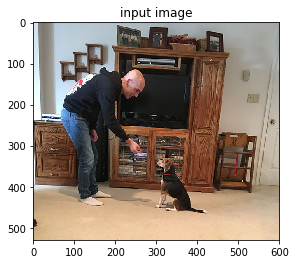

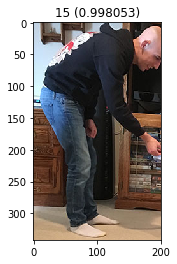

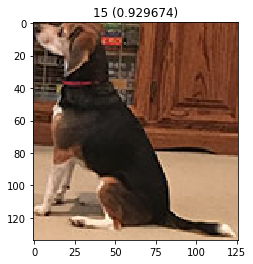

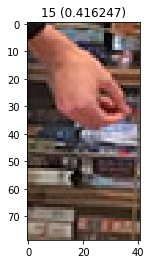

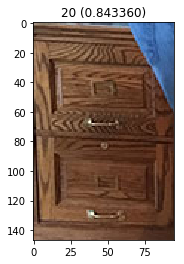

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# 読み込むファイルの名前
img_file = "dog.jpg"
proto_file = "deploy.prototxt"
caffemodel_file = "VGG_VOC0712Plus_SSD_300x300_iter_240000.caffemodel"


# モデルの読み込み
net = cv2.dnn.readNetFromCaffe(proto_file, caffemodel_file)

# 画像の読み込み
image = cv2.imread(img_file)
(h, w) = image.shape[:2]
blob = cv2.dnn.blobFromImage(cv2.resize(image, (300, 300)), 1.0, (300, 300), (0,0,0))
plt.title("input image")
plt.imshow( cv2.cvtColor(image, cv2.COLOR_BGR2RGB) )

# 検出処理
net.setInput(blob)
detections = net.forward()[0,0,:,:]

# 見つかった物体でループ
for i in range(len(detections)):
    confidence = detections[i, 2]
    
    if confidence > 0.2:
        idx = int(detections[i, 1])
        
        # 画像上の左，上，右，下の座標を計算
        l = int(detections[i, 3] * w)
        t = int(detections[i, 4] * h)
        r = int(detections[i, 5] * w)
        b = int(detections[i, 6] * h)
        
        label = "%s (%lf)" % (idx, confidence)
        plt.figure()
        plt.title(label)
        plt.imshow( cv2.cvtColor(image[t:b, l:r, :], cv2.COLOR_BGR2RGB) )

plt.show()